# <span style="color:rgb(160,0,86)">Datenvisualisierung mit Python</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie können mit Python die Verteilung nominaler, ordinaler und metrischer Daten **graphisch darstellen**.
- Sie können Informationen aus **Kreisdiagrammen**, **Balkendiagrammen**, **Histogrammen** und **Boxplots** herauslesen.  

***

### <span style="color:rgb(160,0,86)">Wie können wir die Verteilung von Daten graphisch darstellen?</span>

Lagemasse und Streumasse fassen die Daten mit einem typischen Wert zusammen. Aber es ist auch wertvoll, die **gesamte Verteilung** der Daten zu untersuchen. 
- Die Verteilung *nominaler Merkmale* wird häufig in einem **Kreisdiagramm** dargestellt. Die relativen Häufigkeiten aller Werte des Merkmals werden proportional als Kreissektoren abgebiltet.  
- Für *ordinale Markmale* ist ein **Balkendiagramm** besser geeignet, weil die natürliche Reihenfole der Werte von links nach rechts dargestellt werden kann. Die absoluten oder relativen Häufigkeiten der Werte werden proportional zur Höhe eines Balken abgebildet.   

#### <span style="color:rgb(160,0,86)">Beispiel:</span>

Wir betrachten wieder die 10 ehemaligen Studierenden:

$$\begin{bmatrix}
\text{Anna}&w&\text{ausgezeichnet}&27\\
\text{Beat}&m&\text{gut}&34\\
\text{Cary}&m&\text{sehr gut}&29\\
\text{Dana}&w&\text{sehr gut}&24\\
\text{Elif}&w&\text{gut}&25\\
\text{Faro}&m&\text{ausgezeichnet}&27\\
\text{Gabi}&w&\text{sehr gut}&27\\
\text{Hans}&m&\text{genügend}&69\\
\text{Ivea}&w&\text{sehr gut}&26\\
\text{Jose}&w&\text{gut}&31
\end{bmatrix}$$ 
Die Verteilung des nominalen Merkamls Geschlecht können wir mit einem **Kreisdiagramm** darstellen:

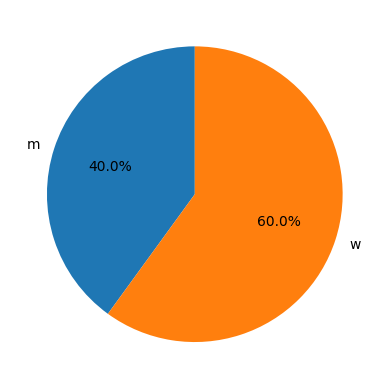

In [1]:
namen = ["Anna","Beat","Cary","Dana","Elif","Faro","Gabi","Hans","Ivea","Jose"]
geschlecht = ["w","m","m","w","w","m","w","m","w","w"]
prädikat = ["ausgezeichnet","gut","sehr gut","sehr gut","gut","ausgezeichnet","sehr gut","genügend","sehr gut","gut"]
alter = [27,34,29,24,25,27,27,69,26,31]

import numpy as np
import pandas as pd
df = pd.DataFrame({"Name":namen,"Geschlecht":geschlecht,
                   "Prädikat":prädikat,"Alter":alter})

werte,absH = np.unique(df["Geschlecht"],return_counts=True)

import matplotlib.pyplot as plt
plt.pie(absH,labels=werte,startangle=90,autopct="%1.1f%%")
plt.show()

Die Verteilung des ordinalen Merkamls Prädikat können wir mit einem **Balkendiagramm** darstellen:

<Axes: xlabel='Prädikat', ylabel='count'>

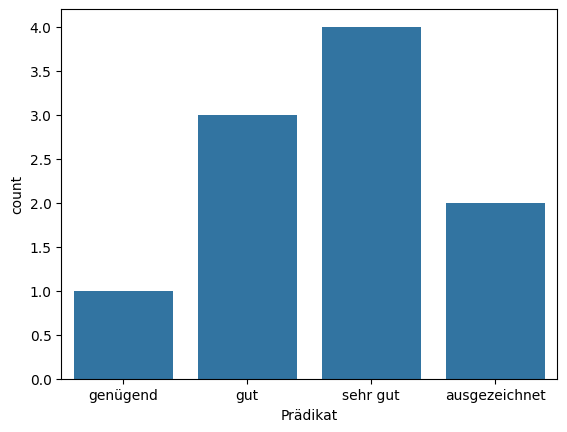

In [2]:
import seaborn as sns
sns.countplot(data=df,x="Prädikat",
              order=["genügend","gut","sehr gut","ausgezeichnet"])

Wie weit die Werte des Markmals **Prädikat** auseinander liegen, ist nicht relevant. Sie sind nur von *genügend* bis *ausgezeichnet* geordnet.
- Die Abstände zwischen Werten eines *metrischen Merkmales* sind hingegen eindeutig gegeben. Oft haben metrische Merkmale auch viele verschiedene Werte, so dass ein Balkendiagramm die Charakteristik einer Verteilung nicht mehr sinnvoll abbildet. Daher unterteilen wir die Werte eines metrischen Merkmals in Abschitte, sogenannte **Klassen**, und bilden die absoluten oder relativen Häufigkeiten der Werte in diesen Klassen mit Rechtecken ab, deren Höhe proportional zu diesen Häufigkeiten ist. Wenn also Häufigkeiten über einer Unterteilung der Zahlenachse abgebildet werden, entsteht ein **Histogramm**:  

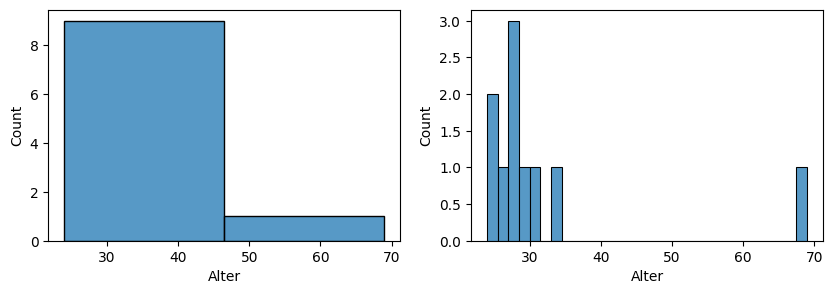

In [3]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(data=df,x="Alter",bins=2)
ax2 = fig.add_subplot(1,2,2)
ax2 = sns.histplot(data=df,x="Alter",bins=30)
plt.show()

- In Histogrammen werden die Häufigkeiten der Klassen proportional zur Höhe der Rechtecke abgebildet. In **Dichtediagrammen** werden die relativen Häufgikeiten der Klassen proportional zur Fläche der Rechtecke abgebildet: 

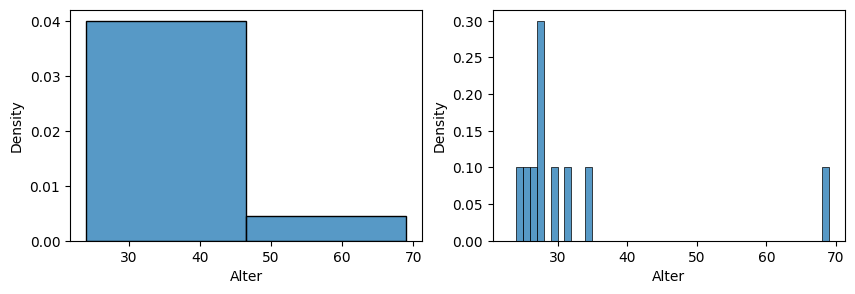

In [4]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(1,2,1)
ax1 = sns.histplot(data=df,x="Alter",bins=2,stat="density")
ax2 = fig.add_subplot(1,2,2)
klassen = np.arange(23,70)
ax2 = sns.histplot(data=df,x="Alter",bins=klassen,stat="density")
plt.show()

Ein Histogramm oder Dichtediagramm heisst:
- **symmetrisch**, wenn die meisten Daten um den Mittelwert liegen und ungefähr die hälfte der Daten unter beziehungsweise über dieser mittleren Lage sind.
- **linksschief**, wenn die Daten weiter nach links abfallen. Es gibt also auf der linken Seiten extreme Werte.
- **rechtsschief**, wenn die Daten weiter nach rechts abfallen. Es gibt also auf der rechten Seiten extreme Werte.

Um die Lage der Daten und die Symmetrie eines metrischen Merkmals graphsich darzustellen, können wir einen sogenannten **Blox-Plot** zeichen:
- mit einem Rechteck, dessen Höhe dem Quartilsabstand $Q$ enspricht
- der Median $x_{50}$ unterteil das Rechteck in zwei Teile
- unten und oben wird mit einem *Whisker* der kleinest beziehungsweise der grösste noch normale Wert angegeben. Wert, die $1.5Q$-mal weiter vom unteren beziehungsweise vom oberen Quartil enfernt sind, heissen **Ausreisser** und sind nicht mehr innerhalb der beiden Whisker. Solche extreme Werte werden im Box-Plot mit einzelnen Punkten abgebildet.   

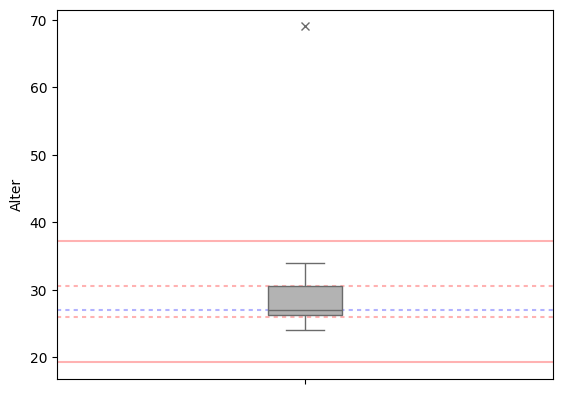

In [8]:
import seaborn as sns
fig, ax = plt.subplots()

#lines
ax.axhline(30.5+1.5*(30.5-26), color="red",alpha=0.3)
ax.axhline(26-1.5*(30.5-26), color="red",alpha=0.3)
ax.axhline(30.5, color="red",alpha=0.3, dashes=(2,2))
ax.axhline(27, color="blue",alpha=0.3, dashes=(2,2))
ax.axhline(26, color="red",alpha = 0.3, dashes=(2,2))

#plot
ax = sns.boxplot(y="Alter",data=df,width=0.15,
                 color="0.7",flierprops={"marker":"x"})

#ax = sns.swarmplot(y="Alter",data=df)
#ax = sns.stripplot(y="Alter",data=df,color="red")


#### <span style="color:rgb(160,0,86)">Beispiel für einen Regenwolken-Plot:</span>

In [9]:
# pip install palmerpenguins
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [10]:
penguins = load_penguins().dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import ptitprince as pt  # für den rainplot

fig, ax = plt.subplots()
ax = pt.RainCloud(x="species", y="flipper_length_mm", data=penguins, ax=ax)
ax.set(xlabel='Spezies', ylabel='Flossenlänge', title='Palmers Pinguine')
plt.show()

ImportError: cannot import name '_CategoricalScatterPlotter' from 'seaborn.categorical' (C:\workspace\hslu\astat\venv\Lib\site-packages\seaborn\categorical.py)

In [12]:
import pandas as pd
gla_cities = pd.read_csv("Daten/GLA_World_Cities_2016.csv")
gla_cities["Population"] = \
gla_cities["Population"].str.replace(",","").astype(float)
gla_cities.head(3)

,City,Country,Population,Inland area in km2,Density in people per hectare,Dwellings,Density in dwellings per hectare,People per dwelling,Approx city radius km,Main topographical constraint,Constraint
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Greater London,England,8663300.0,"1,572",55.0,"3,454,490",22.0,2.5,23.0,Rivers,4%
2,Inner London,England,3439700.0,319,108.0,"1,460,840",46.0,2.4,10.0,Rivers,5%


Text(24.000000000000007, 0.5, 'Population for the Cities in the dataset')

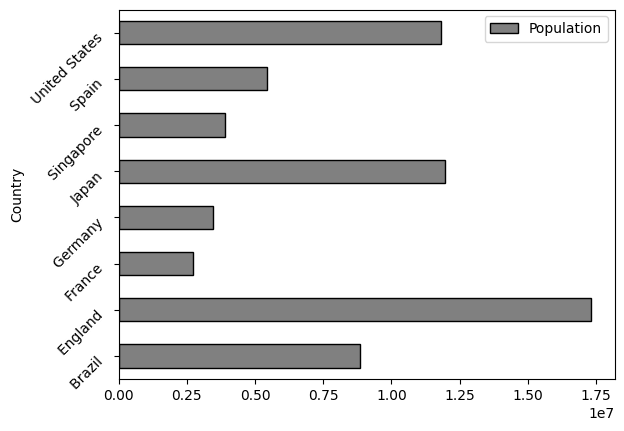

In [13]:
pop = gla_cities.groupby("Country")[["Population"]].sum()
pop.plot(y="Population",kind="barh",rot=45,color="gray",edgecolor="black")
ax.set_xlabel("County")
ax.set_ylabel("Population for the Cities in the dataset")

<Axes: xlabel='Population (M)', ylabel='Country'>

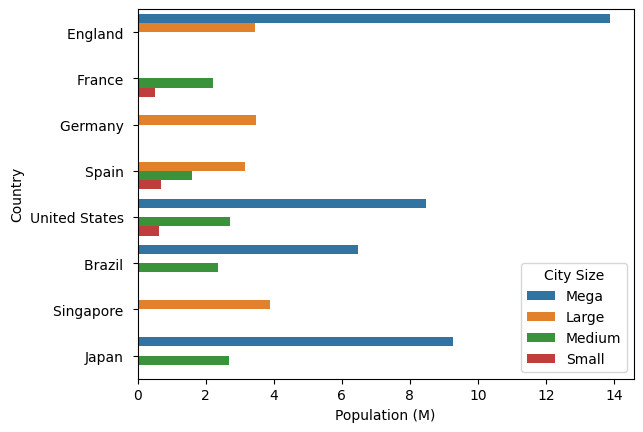

In [19]:
def city_size(x):
    if x < 1.5:
        s = "Small"
    elif 1.5 <= x < 3:
        s = "Medium"
    elif 3 <= x < 5:
        s = "Large"
    else:
        s = "Mega"
    return s
gla_cities["Population (M)"] = gla_cities["Population"]/1000000
gla_cities["City Size"] = gla_cities["Population (M)"].apply(city_size)
sns.barplot(data=gla_cities,x="Population (M)",y="Country",hue="City Size",errorbar=None,estimator=sum)

#### <span style="color:rgb(160,0,86)">Weitere interessante Möglichkeiten mit Python:</span>
- https://matplotlib.org/stable/gallery/index.html
- https://seaborn.pydata.org/

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>

Laden Sie die Daten *2021_Personalerhebung.csv* und zeichnen Sie für alle Merkmale passende Diagramme, die die Verteilung der Daten abbilden.

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>

Laden Sie die Daten *Gesundheitskosten.csv* und zeichnen Sie für alle Merkmale passende Diagramme, die die Verteilung der Daten abbilden.

In [ ]:
# To do!

### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

Laden Sie die Daten *2022_Mathematik 1 WiSo Urliste* und zeichnen Sie für die Punkteverteilung der Aufgaben passende Diagramme. 

Bestimmen Sie gemäss der Formel $$\frac{\text{Erreichte Anzahl Punkte}}{\text{maximale Anzahl Punkte}}\cdot 5 + 1$$ für alle Studierende die Note und stellen Sie die Verteilung der Noten graphisch dar. Bestimmen Sie auch passende Lage- und Streumasse für die Noten.

In [ ]:
# To do!

![HSLU](Bilder/LogoHSLU.png)